In [ ]:
!pip install requests
!pip install tabulate
!pip install future
!pip install matplotlib

In [ ]:
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.1-py2.py3-none-any.whl size=249152215 sha256=03ea113635caab73ed5e49f0349c4e65e9e30c8acb9b99a48564d7748eda3e79
  Stored in directory: /root/.cache/pip/wheels/2e/2f/04/ef0554c89bcb5d38a6fc082a87f497933109faefd94dcdc3d2
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptxq2rnab
  JVM stdout: /tmp/tmptxq2rnab/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptxq2rnab/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,"28 days, 19 hours and 30 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_bs31vn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
dataframe = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y = "density_percent"
x = dataframe.columns
x.remove(y)
x

['meanWidth',
 'meanHeight',
 'meanLength',
 'meanVolume',
 'countStacking',
 'countTurnover',
 'boxesCount',
 'loadingWidth',
 'loadingHeight',
 'loadingLength']

In [ ]:
splits = dataframe.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [ ]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train, validation_frame = test)

AutoML progress: |
13:19:14.439: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230719_131914,13.0058,169.15,8.86164,0.224441,169.15
GBM_grid_1_AutoML_1_20230719_131914_model_8,13.09,171.348,8.44745,0.222906,171.348
StackedEnsemble_AllModels_3_AutoML_1_20230719_131914,13.1385,172.62,8.97402,0.224901,172.62
XGBoost_grid_1_AutoML_1_20230719_131914_model_2,13.1621,173.24,8.50322,0.22161,173.24
StackedEnsemble_BestOfFamily_3_AutoML_1_20230719_131914,13.1783,173.668,9.03891,0.226519,173.668
DRF_1_AutoML_1_20230719_131914,13.1914,174.012,8.95567,0.226571,174.012
GBM_grid_1_AutoML_1_20230719_131914_model_21,13.1918,174.023,8.46002,0.222825,174.023
StackedEnsemble_AllModels_2_AutoML_1_20230719_131914,13.2093,174.485,8.98051,0.227176,174.485
XRT_1_AutoML_1_20230719_131914,13.2096,174.492,8.90027,0.226301,174.492
StackedEnsemble_AllModels_1_AutoML_1_20230719_131914,13.2686,176.057,9.20756,0.229498,176.057


In [ ]:
performance = aml.leader.model_performance(test)
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 140.89639058228786
RMSE: 11.869978541778746
MAE: 8.308866418833304
RMSLE: 0.18048541620726694
Mean Residual Deviance: 140.89639058228786
R^2: 0.4820353957881902
Null degrees of freedom: 129
Residual degrees of freedom: 124
Null deviance: 35492.831111480395
Residual deviance: 18316.53077569742
AIC: 1026.1672428543893


In [ ]:
pred = aml.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
pred['predict']

predict
73.0698
60.1488
53.8613
91.5756
80.3978
84.6595
92.9226
84.4207
86.9228
69.709


In [ ]:
pred_df['predict'][0]

73.0698133460502

In [ ]:
test_df = test.as_data_frame()
pred_df = pred.as_data_frame()

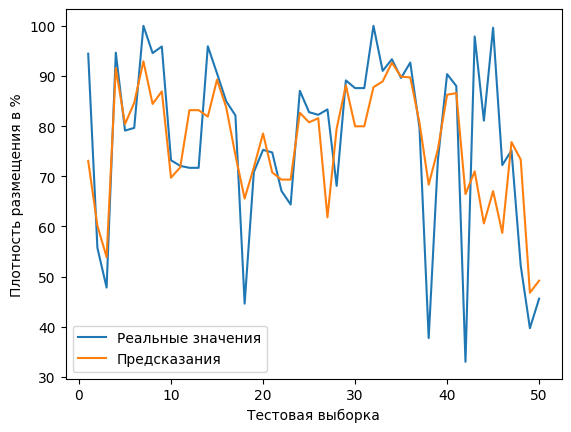

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(list(range(1, 51)), test_df['density_percent'][:50],  label="Реальные значения")
plt.plot(list(range(1, 51)), pred_df[:50], label="Предсказания")
plt.legend(loc="lower left")
plt.ylabel("Плотность размещения в %")
plt.xlabel("Тестовая выборка")
plt.show()

In [ ]:
model_path = h2o.save_model(model=aml.leader, path="/tmp/mymodel", force=True)
print(model_path)

/tmp/mymodel/StackedEnsemble_BestOfFamily_4_AutoML_5_20230717_164905


In [ ]:
path = '/content/model.zip'
aml.leader.save_mojo(path)

'/content/model.zip/StackedEnsemble_BestOfFamily_4_AutoML_5_20230717_164905.zip'

In [ ]:
imported_model = h2o.import_mojo('/content/model.zip/StackedEnsemble_BestOfFamily_4_AutoML_5_20230717_164905.zip')

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


In [ ]:
saved_model = h2o.load_model(model_path)

# download the model built above to your local machine
my_local_model = h2o.download_model(aml.leader, path="/Users/Denis/Desktop")
print(my_local_model)

/Users/Denis/Desktop/StackedEnsemble_BestOfFamily_4_AutoML_5_20230717_164905


In [ ]:
p = saved_model.pedict(test)

AttributeError: ignored

In [ ]:
from h2o.estimators import H2ODeepLearningEstimator

new_model = H2ODeepLearningEstimator(distribution="AUTO",
                               epochs=150,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)


new_model.train(x=x,y=y, training_frame=train)

In [ ]:
prediction = new_model.predict(test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [ ]:
performance = new_model.model_performance(test)
print(performance)

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 250.02447090740955
RMSE: 15.812162119944556
MAE: 11.378224806078377
RMSLE: 0.23306802385457848
Mean Residual Deviance: 250.02447090740955


In [ ]:
test_df = test.as_data_frame()
pred_df = prediction.as_data_frame()

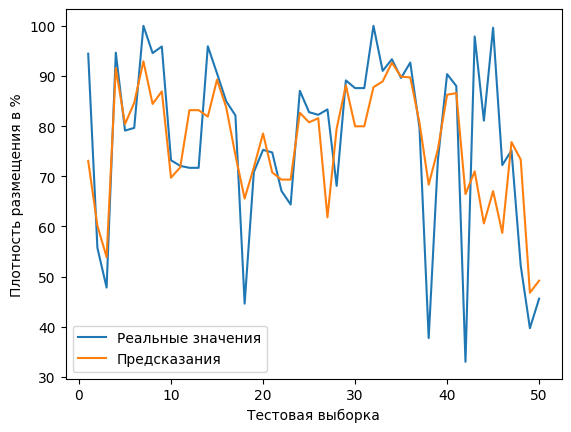

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(list(range(1, 51)), test_df['density_percent'][:50],  label="Реальные значения")
plt.plot(list(range(1, 51)), pred_df[:50], label="Предсказания")
plt.legend(loc="lower left")
plt.ylabel("Плотность размещения в %")
plt.xlabel("Тестовая выборка")
plt.show()

In [ ]:
from h2o.estimators import H2OGradientBoostingEstimator


In [ ]:
new_model = H2OGradientBoostingEstimator()


new_model.train(x=x,y=y, training_frame=train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1689600629121_78


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          11719                  5            5            5             8             20            14.06

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 81.33492574998482
RMSE: 9.018587791333232
MAE: 6.747384320301224
RMSLE: 0.16621548180542287
Mean Residual Deviance: 81.33492574998482

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2023-07-17 14:41:00  0.008 sec   0.0                18.654938870125715  15.283729533548938  348.0067442481273
     2023-07-17 14:41:00  0.029 sec   1.0                17.93664359476177   14.62861617980712   321.7231834455084
     2023-07-17 14:41:00  0.053 sec   2.0                17.28278953679826   14.010180446517515  298.69481417326335
     2023-07-17 14:41:00  0.064 sec   3.0                16.741505046638956  13.527795309043793  280.2779912266376
     2023-07-17 14:41:00  0.083 sec   4.0                16.17667575842824   13.044831318070132  261.68483859331985
     2023-07-17 14:41:01  0.094 sec   5.0                15.732294070538249  12.638570548061386  247.50507672189295
     2023-07-17 14:41:01  0.109 sec   6.0                15.344073879980655  12.283504195002667  235.44060323430458
     2023-07-17 14:41:01  0.117 sec   7.0                15.019710324173818  11.983090213024951  225.5916982220936
     2023-07-17 14:41:01  0.126 sec   8.0                14.606073509222183  11.610224252723786  213.33738335680204
     2023-07-17 14:41:01  0.142 sec   9.0                14.250658341248599  11.30989092325111   203.08126315899827
---  ---                  ---         ---                ---                 ---                 ---
     2023-07-17 14:41:01  0.521 sec   41.0               9.563042310856485   7.229396659207631   91.45177823923133
     2023-07-17 14:41:01  0.532 sec   42.0               9.482204500160645   7.1619818660628844  89.91220218286678
     2023-07-17 14:41:01  0.540 sec   43.0               9.453277670971486   7.131105737035054   89.3644587244881
     2023-07-17 14:41:01  0.550 sec   44.0               9.37902996061695    7.072573910755326   87.96620300215041
     2023-07-17 14:41:01  0.556 sec   45.0               9.303613822498079   7.0108254903770355  86.55723015817732
     2023-07-17 14:41:01  0.563 sec   46.0               9.21145800759853    6.9174714069289855  84.85095862575109
     2023-07-17 14:41:01  0.569 sec   47.0               9.174981928341861   6.887946086715024   84.18029338539972
     2023-07-17 14:41:01  0.579 sec   48.0               9.113825784262243   6.831690171636252   83.0618204258833
     2023-07-17 14:41:01  0.590 sec   49.0               9.057249901948875   6.783605223199928   82.0337757863529
     2023-07-17 14:41:01  0.600 sec   50.0               9.018587791333232   6.747384320301224   81.33492574998482
[51 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
meanHeight     133229                 1                    0.19061
meanLength     107009                 0.803196             0.153097
meanWidth      85000.3                0.638003             0.12161
loadingHeight  79079.7                0.593564             0.113139
meanVolume     69843.3                0.524236             0.0999244
loadingWidth